In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
google_data = pd.read_csv("GooglePayIndia.csv")
paytm_data = pd.read_csv("PaytmIndia.csv")
phonepay_data = pd.read_csv("PhonePayIndia.csv")

In [6]:
google_data.head()

,Unnamed: 0,reviewId,userName,userImage,content,score,thumbsUpCount,reviewCreatedVersion,at,replyContent,repliedAt
0,0,gp:AOqpTOEdT_VactGi_J9Q2PEWY7J4XlD7BINhOj9xwOr...,Len Pagnam,https://play-lh.googleusercontent.com/a-/AOh14...,How do add a boarding pass? I see no passes tab.,1,0,2.137.401329300,2021-11-18 17:03:06,Hi Len. Could you try the steps in this guide ...,2021-11-18 17:27:11
1,1,gp:AOqpTOHltpCzXurPoFUgj-a3L-wApC93-fTvocbF9K7...,Benjamin Silva,https://play-lh.googleusercontent.com/a/AATXAJ...,Best,5,0,2.134.392709498,2021-11-18 16:43:34,NaN,NaN
2,2,gp:AOqpTOGTiyxy_FWSQe7eCONa7PsIP6v7cS-xWCL6jFF...,PARVESH MIAR,https://play-lh.googleusercontent.com/a-/AOh14...,All ok,5,0,2.138.406141160,2021-11-18 16:12:42,NaN,NaN
3,3,gp:AOqpTOHllyGnmLGZqPUGokxYncq9kOKoY3Zz_4ZF6b0...,Mikko L.,https://play-lh.googleusercontent.com/a-/AOh14...,"Rasy to use really... But there never, ever sh...",3,0,2.138.406141160,2021-11-18 16:06:35,NaN,NaN
4,4,gp:AOqpTOHjnJ6gAF4NzruhLDGVszAaTKSerVeKt-UtJfM...,A Google user,https://play-lh.googleusercontent.com/EGemoI2N...,I still do not understand why your restricting...,3,251,2.134.392709498,2021-11-18 15:48:08,NaN,NaN


In [7]:
google_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34228 entries, 0 to 34227
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   Unnamed: 0            34228 non-null  int64 
 1   reviewId              34228 non-null  object
 2   userName              34227 non-null  object
 3   userImage             34228 non-null  object
 4   content               34223 non-null  object
 5   score                 34228 non-null  int64 
 6   thumbsUpCount         34228 non-null  int64 
 7   reviewCreatedVersion  29987 non-null  object
 8   at                    34228 non-null  object
 9   replyContent          6112 non-null   object
 10  repliedAt             6112 non-null   object
dtypes: int64(3), object(8)
memory usage: 2.9+ MB


In [8]:
num_category = [feature for feature in google_data.columns if google_data[feature].dtypes != "O"]
google_data[num_category].isnull().sum()

Unnamed: 0       0
score            0
thumbsUpCount    0
dtype: int64

In [9]:
num_category = [feature for feature in paytm_data.columns if paytm_data[feature].dtypes != "O"]
paytm_data[num_category].isnull().sum()

Unnamed: 0       0
score            1
thumbsUpCount    1
dtype: int64

In [10]:
num_category = [feature for feature in phonepay_data.columns if phonepay_data[feature].dtypes != "O"]
phonepay_data[num_category].isnull().sum()

Unnamed: 0       0
score            0
thumbsUpCount    0
dtype: int64

<Axes: title={'center': 'Checking Outliers in PhonePay thumbsUpCount Column'}, xlabel='thumbsUpCount'>

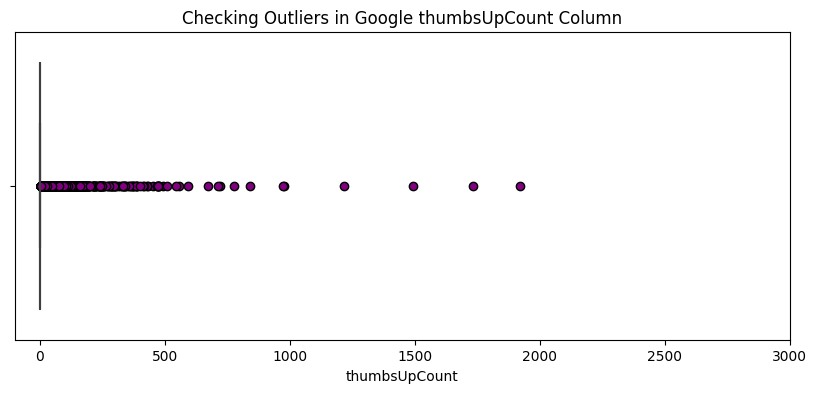

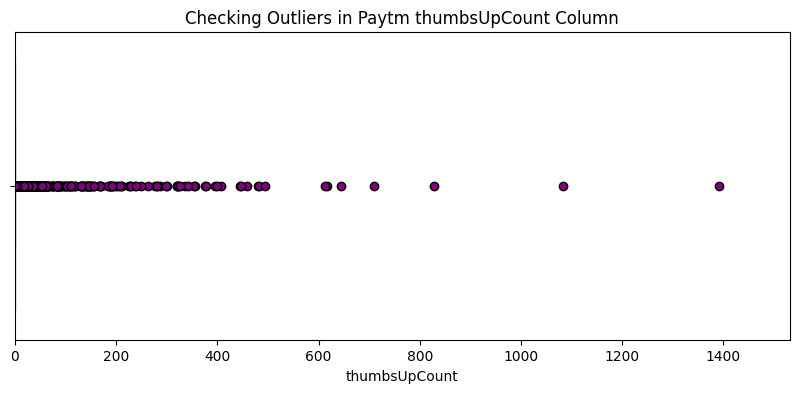

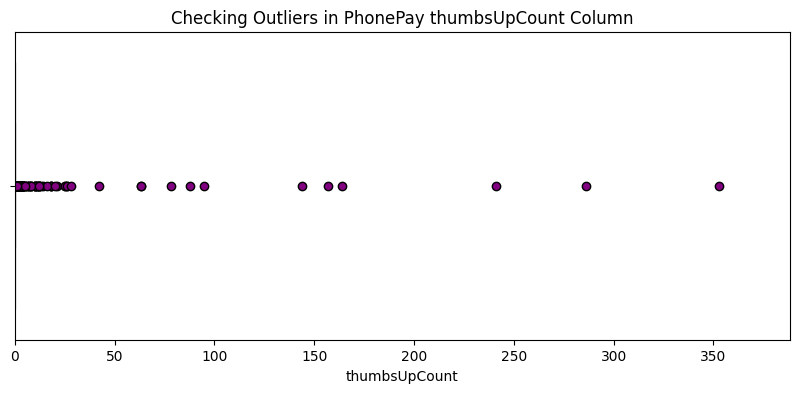

In [11]:
plt.figure(figsize=(10,4))
plt.xlim(-100, 3000)
flierprops = dict(marker='o', markerfacecolor='purple', markersize=6,
                  linestyle='none', markeredgecolor='black')
plt.title("Checking Outliers in Google thumbsUpCount Column")
sns.boxplot(x=google_data.thumbsUpCount, flierprops=flierprops)

plt.figure(figsize=(10,4))
plt.title("Checking Outliers in Paytm thumbsUpCount Column")
plt.xlim(paytm_data.thumbsUpCount.min(), paytm_data.thumbsUpCount.max()*1.1)
sns.boxplot(x=paytm_data.thumbsUpCount, flierprops=flierprops)

plt.figure(figsize=(10,4))
plt.title("Checking Outliers in PhonePay thumbsUpCount Column")
plt.xlim(phonepay_data.thumbsUpCount.min(), phonepay_data.thumbsUpCount.max()*1.1)
sns.boxplot(x=phonepay_data.thumbsUpCount, flierprops=flierprops)

In [12]:
google_data = google_data[google_data["thumbsUpCount"] <=500]
paytm_data = paytm_data[paytm_data["thumbsUpCount"] <=550]
phonepay_data = phonepay_data[phonepay_data["thumbsUpCount"] <=100]
google_data.head()

,Unnamed: 0,reviewId,userName,userImage,content,score,thumbsUpCount,reviewCreatedVersion,at,replyContent,repliedAt
0,0,gp:AOqpTOEdT_VactGi_J9Q2PEWY7J4XlD7BINhOj9xwOr...,Len Pagnam,https://play-lh.googleusercontent.com/a-/AOh14...,How do add a boarding pass? I see no passes tab.,1,0,2.137.401329300,2021-11-18 17:03:06,Hi Len. Could you try the steps in this guide ...,2021-11-18 17:27:11
1,1,gp:AOqpTOHltpCzXurPoFUgj-a3L-wApC93-fTvocbF9K7...,Benjamin Silva,https://play-lh.googleusercontent.com/a/AATXAJ...,Best,5,0,2.134.392709498,2021-11-18 16:43:34,NaN,NaN
2,2,gp:AOqpTOGTiyxy_FWSQe7eCONa7PsIP6v7cS-xWCL6jFF...,PARVESH MIAR,https://play-lh.googleusercontent.com/a-/AOh14...,All ok,5,0,2.138.406141160,2021-11-18 16:12:42,NaN,NaN
3,3,gp:AOqpTOHllyGnmLGZqPUGokxYncq9kOKoY3Zz_4ZF6b0...,Mikko L.,https://play-lh.googleusercontent.com/a-/AOh14...,"Rasy to use really... But there never, ever sh...",3,0,2.138.406141160,2021-11-18 16:06:35,NaN,NaN
4,4,gp:AOqpTOHjnJ6gAF4NzruhLDGVszAaTKSerVeKt-UtJfM...,A Google user,https://play-lh.googleusercontent.com/EGemoI2N...,I still do not understand why your restricting...,3,251,2.134.392709498,2021-11-18 15:48:08,NaN,NaN


In [13]:
cat_category = [feature for feature in google_data.columns if google_data[feature].dtypes == "O"]
google_data[cat_category].isnull().sum()

reviewId                    0
userName                    1
userImage                   0
content                     5
reviewCreatedVersion     4241
at                          0
replyContent            28106
repliedAt               28106
dtype: int64

In [14]:
google_data = google_data.drop(columns=["reviewCreatedVersion", "repliedAt"])
google_data["replyContent"] = google_data["replyContent"].fillna("No_reply/No_data")

In [15]:
cat_category = [feature for feature in paytm_data.columns if paytm_data[feature].dtypes == "O"]
paytm_data[cat_category].isnull().sum()

reviewId                    0
userName                    0
userImage                   0
content                     2
reviewCreatedVersion    20073
at                          0
replyContent            59569
repliedAt               59569
dtype: int64

In [16]:
paytm_data = paytm_data.drop(columns=["reviewCreatedVersion","repliedAt"])
paytm_data["replyContent"] = paytm_data["replyContent"].fillna("No_reply/No_data")

In [17]:
cat_category = [feature for feature in phonepay_data.columns if phonepay_data[feature].dtypes == "O"]
phonepay_data[cat_category].isnull().sum()

reviewId                   0
userName                   0
userImage                  0
content                    0
reviewCreatedVersion    2136
at                         0
replyContent            8803
repliedAt               8803
dtype: int64

In [18]:
phonepay_data = phonepay_data.drop(columns=["reviewCreatedVersion", "repliedAt"])
phonepay_data["replyContent"] = phonepay_data["replyContent"].fillna("No_reply/No_data")

In [19]:
google_data = google_data.drop(["Unnamed: 0", "reviewId", "userName", "userImage"],axis=1)
paytm_data = paytm_data.drop(["Unnamed: 0", "reviewId", "userName", "userImage"],axis=1)
phonepay_data = phonepay_data.drop(["Unnamed: 0", "reviewId", "userName", "userImage"],axis=1)

In [20]:
google_data["upi_company"] = "Google"
paytm_data["upi_company"] = "paytm"
phonepay_data["upi_company"] = "phonepay"

In [21]:
google_data = google_data.sample(frac=1).reset_index(drop=True)
paytm_data = paytm_data.sample(frac=1).reset_index(drop=True)
phonepay_data = phonepay_data.sample(frac=1).reset_index(drop=True)

data = phonepay_data.append([paytm_data[:11735 ], google_data[:11735]], ignore_index=True)

data = data.rename(columns={"at": "review_created_at"})
data.head()

<ipython-input-21-c31b31664535>:5: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = phonepay_data.append([paytm_data[:11735 ], google_data[:11735]], ignore_index=True)


,content,score,thumbsUpCount,review_created_at,replyContent,upi_company
0,🤣🤣🤣🤣,1.0,0.0,2021-11-16 19:18:15,No_reply/No_data,phonepay
1,You should do work on your fonpe like Paytm sm...,3.0,0.0,2021-11-12 14:32:44,"Hi Bipin, we're sorry to know that you've had ...",phonepay
2,Praud of you,5.0,0.0,2021-11-17 15:03:59,Thank you for the review about our application...,phonepay
3,Achha hai,5.0,0.0,2021-11-17 10:30:00,No_reply/No_data,phonepay
4,Godnks,5.0,0.0,2021-11-14 19:12:03,No_reply/No_data,phonepay


In [22]:
data = data.sample(frac=1).reset_index(drop=True)
data.head()

,content,score,thumbsUpCount,review_created_at,replyContent,upi_company
0,Good,5.0,0.0,2021-11-02 10:39:52,Awesome! It's been our pleasure. You can also ...,paytm
1,Good,5.0,0.0,2021-11-11 20:32:07,No_reply/No_data,phonepay
2,How do I make this app download at 3am when I'...,3.0,0.0,2019-10-27 02:25:00,No_reply/No_data,Google
3,Dont know what I'd do with out it. #dopesickdo...,5.0,0.0,2020-02-03 01:05:12,No_reply/No_data,Google
4,fantastic,5.0,0.0,2021-10-05 22:31:27,Awesome! It's been our pleasure. You can also ...,paytm


In [23]:
data["review_created_at"] = pd.to_datetime(data["review_created_at"])
data["Year"] = data['review_created_at'].dt.year
data["month"] = data['review_created_at'].dt.month
data = data[["upi_company", "Year", "month", "content", "score", "thumbsUpCount", "replyContent"]]
data.head()

,upi_company,Year,month,content,score,thumbsUpCount,replyContent
0,paytm,2021,11,Good,5.0,0.0,Awesome! It's been our pleasure. You can also ...
1,phonepay,2021,11,Good,5.0,0.0,No_reply/No_data
2,Google,2019,10,How do I make this app download at 3am when I'...,3.0,0.0,No_reply/No_data
3,Google,2020,2,Dont know what I'd do with out it. #dopesickdo...,5.0,0.0,No_reply/No_data
4,paytm,2021,10,fantastic,5.0,0.0,Awesome! It's been our pleasure. You can also ...


In [24]:
scores = [0, 1, 2, 3, 4, 5]
scores_name = ["very Negative", "Negative", "Average", "Positive", "Excellent"]
data["score"] = pd.cut(data["score"],scores, labels=scores_name)
data.head()
backup_data = data.copy()

<ipython-input-24-34442c0fb39e>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data["score"] = pd.cut(data["score"],scores, labels=scores_name)


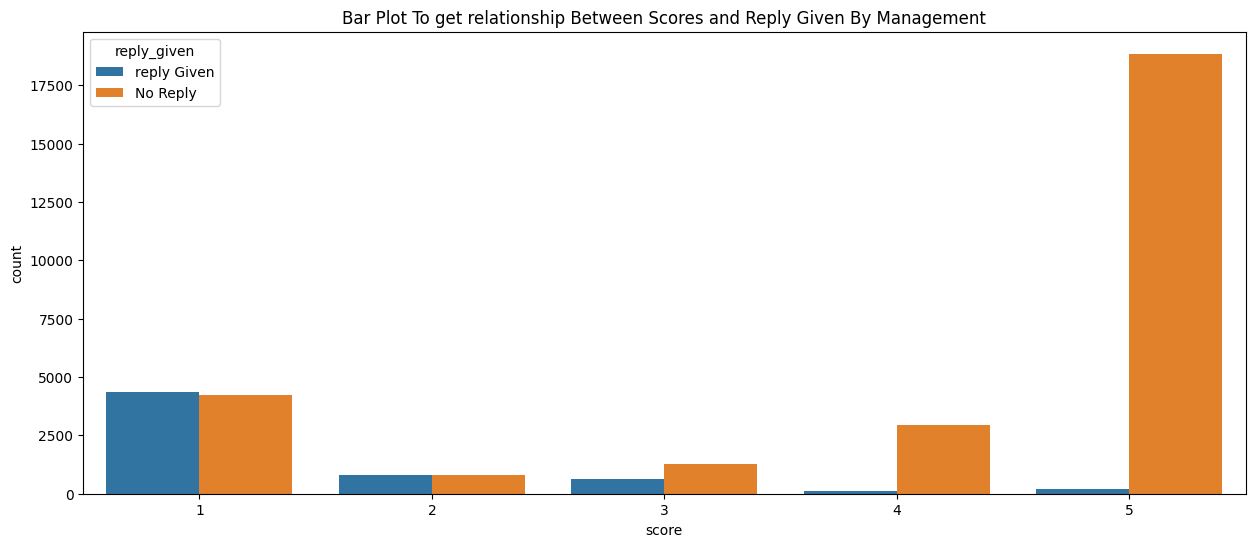

In [25]:
google_data["reply_given"] = google_data["replyContent"].apply(lambda x: "reply Given" if x != 'No_reply/No_data' else "No Reply")

plt.figure(figsize=(15,6))
sns.countplot(x="score", hue="reply_given", data=google_data)
plt.title('Bar Plot To get relationship Between Scores and Reply Given By Management')
plt.show()

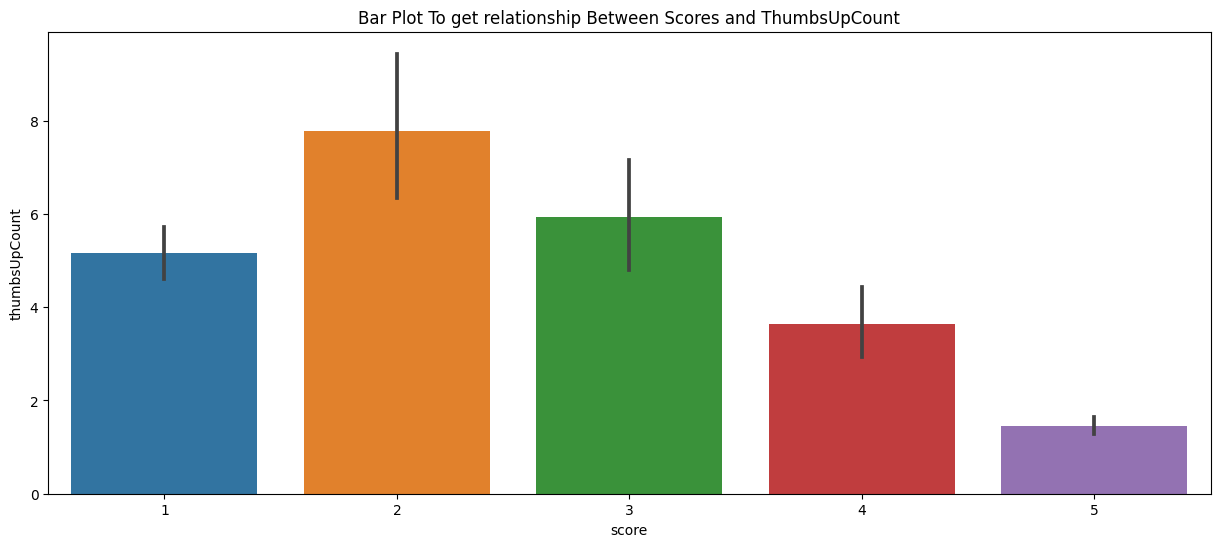

In [26]:
plt.figure(figsize=(15,6))
sns.barplot(x="score", y="thumbsUpCount", data=google_data)
plt.title('Bar Plot To get relationship Between Scores and ThumbsUpCount')
plt.show()

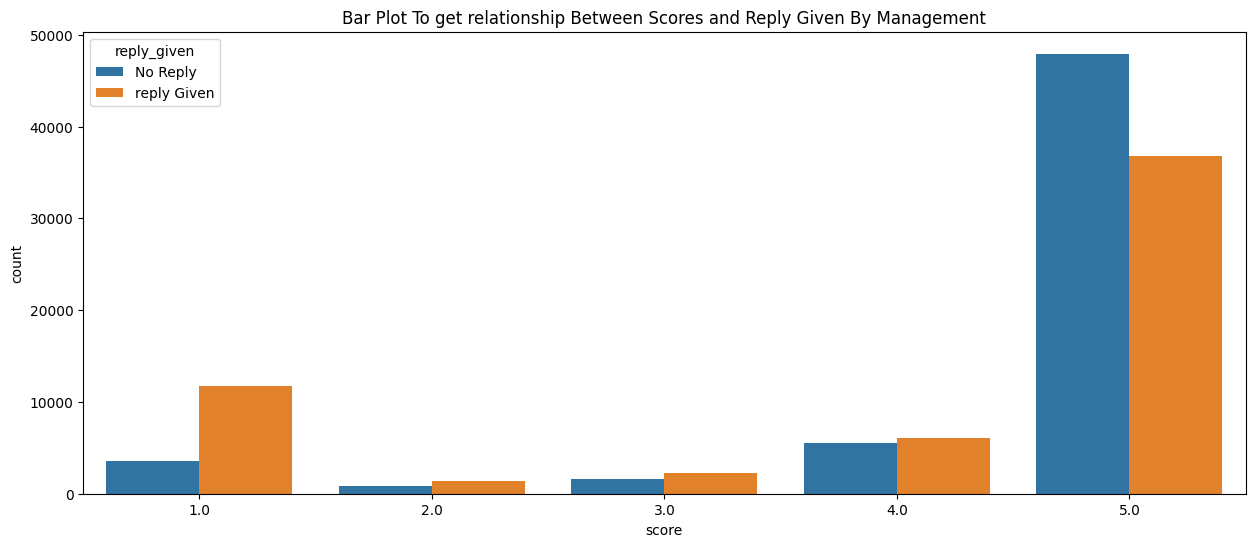

In [27]:
paytm_data["reply_given"] = paytm_data["replyContent"].apply(lambda x: "reply Given" if x != 'No_reply/No_data' else "No Reply")

plt.figure(figsize=(15,6))
sns.countplot(x="score", hue="reply_given", data=paytm_data)
plt.title('Bar Plot To get relationship Between Scores and Reply Given By Management')
plt.show()

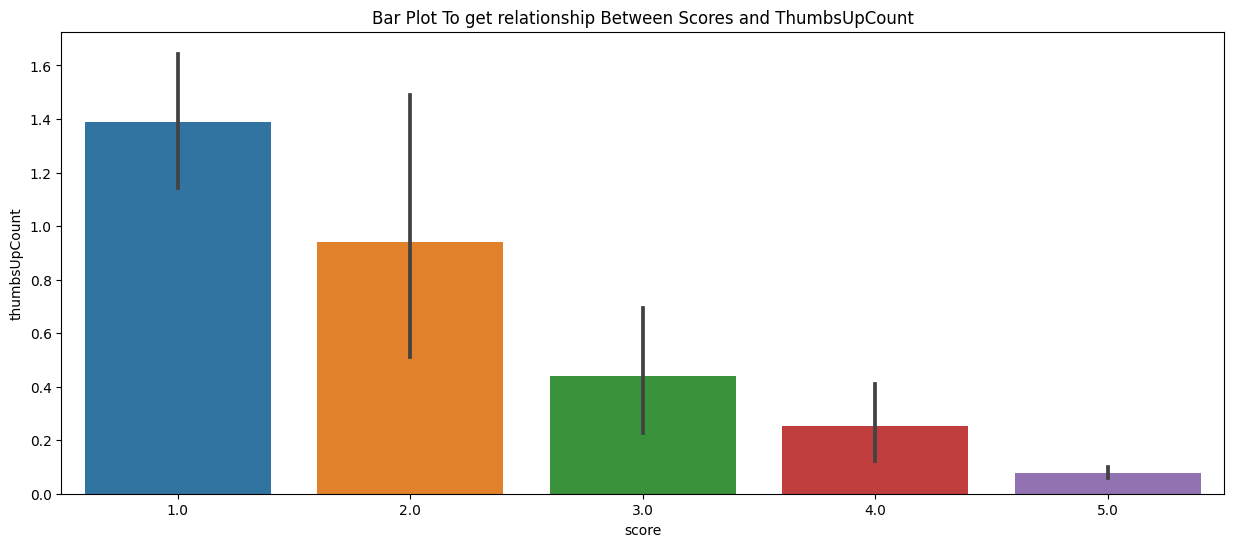

In [28]:
plt.figure(figsize=(15,6))
sns.barplot(x="score", y="thumbsUpCount", data=paytm_data)
plt.title('Bar Plot To get relationship Between Scores and ThumbsUpCount')
plt.show()

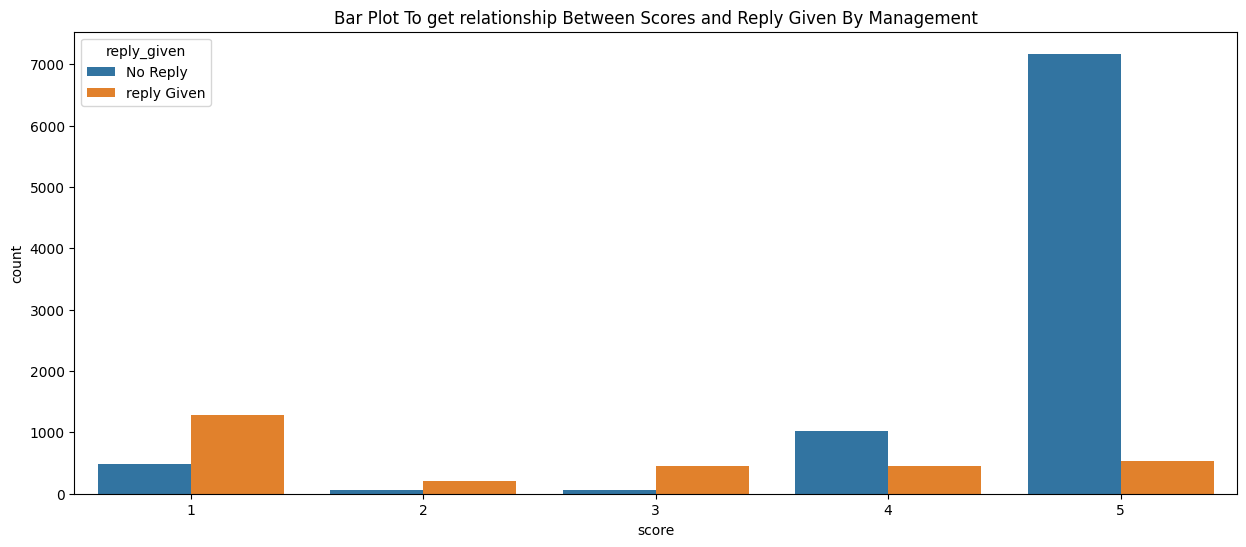

In [29]:
phonepay_data["reply_given"] = phonepay_data["replyContent"].apply(lambda x: "reply Given" if x != 'No_reply/No_data' else "No Reply")

plt.figure(figsize=(15,6))
sns.countplot(x="score", hue="reply_given", data=phonepay_data)
plt.title('Bar Plot To get relationship Between Scores and Reply Given By Management')
plt.show()

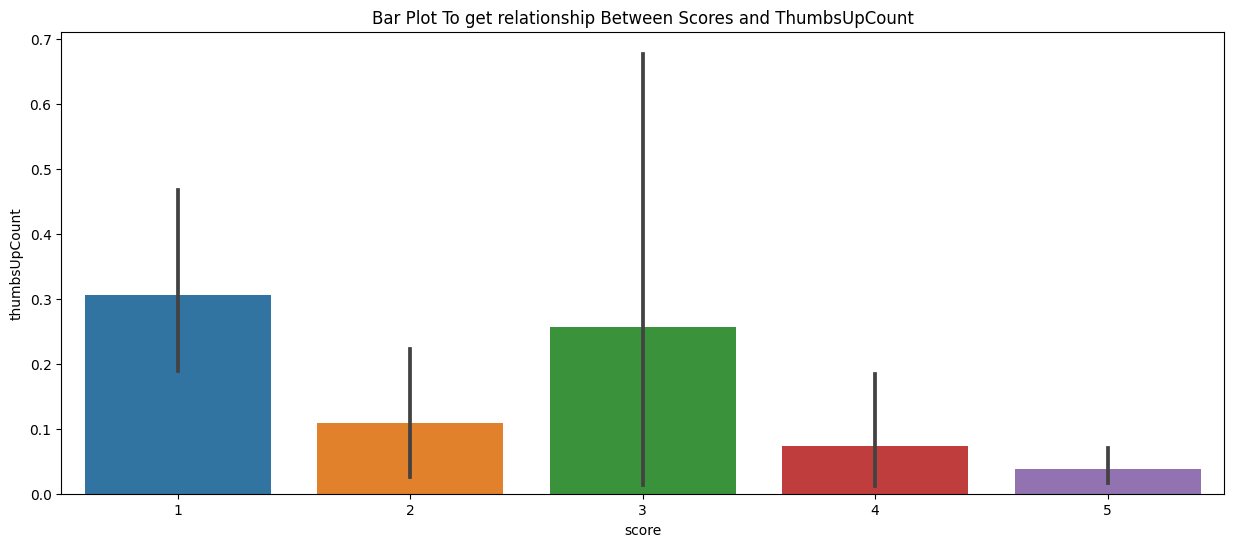

In [30]:
plt.figure(figsize=(15,6))
sns.barplot(x="score", y="thumbsUpCount", data=phonepay_data)
plt.title('Bar Plot To get relationship Between Scores and ThumbsUpCount')
plt.show()

In [31]:
data.head()

,upi_company,Year,month,content,score,thumbsUpCount,replyContent
0,paytm,2021,11,Good,Excellent,0.0,Awesome! It's been our pleasure. You can also ...
1,phonepay,2021,11,Good,Excellent,0.0,No_reply/No_data
2,Google,2019,10,How do I make this app download at 3am when I'...,Average,0.0,No_reply/No_data
3,Google,2020,2,Dont know what I'd do with out it. #dopesickdo...,Excellent,0.0,No_reply/No_data
4,paytm,2021,10,fantastic,Excellent,0.0,Awesome! It's been our pleasure. You can also ...


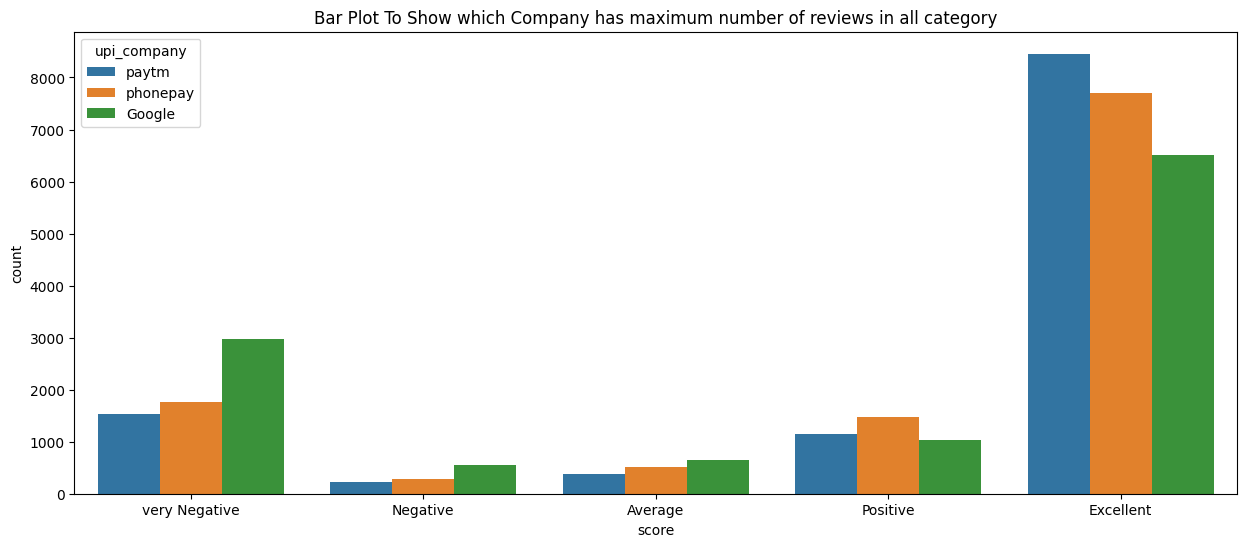

In [32]:
plt.figure(figsize=(15,6))
sns.countplot(x="score", hue="upi_company", data=data)
plt.title('Bar Plot To Show which Company has maximum number of reviews in all category')
plt.show()

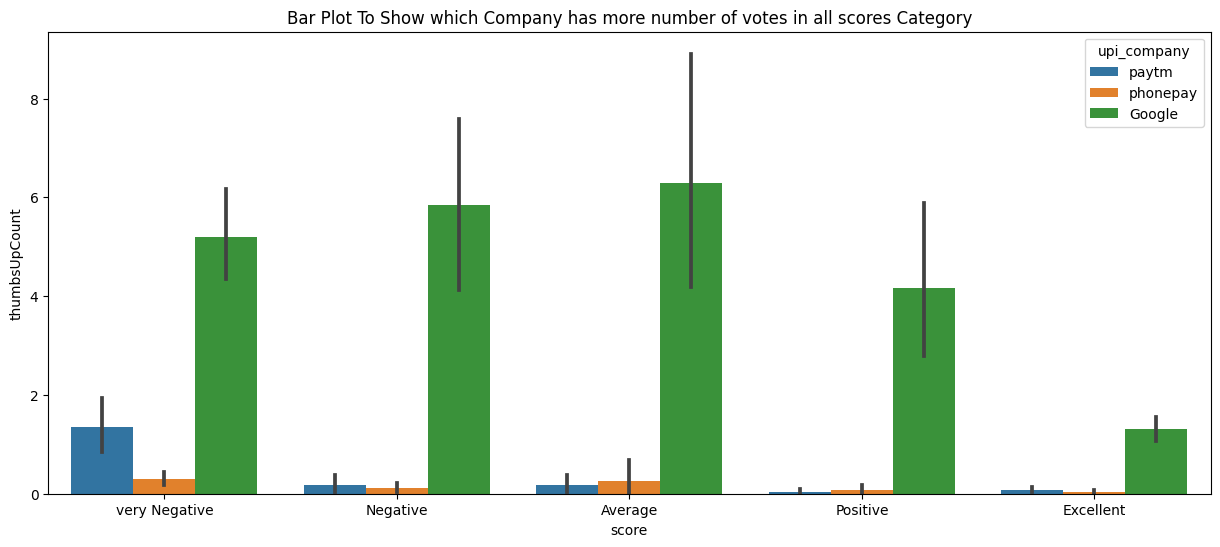

In [33]:
plt.figure(figsize=(15,6))
sns.barplot(x="score", y="thumbsUpCount", hue="upi_company", data=data)
plt.title('Bar Plot To Show which Company has more number of votes in all scores Category')
plt.show()

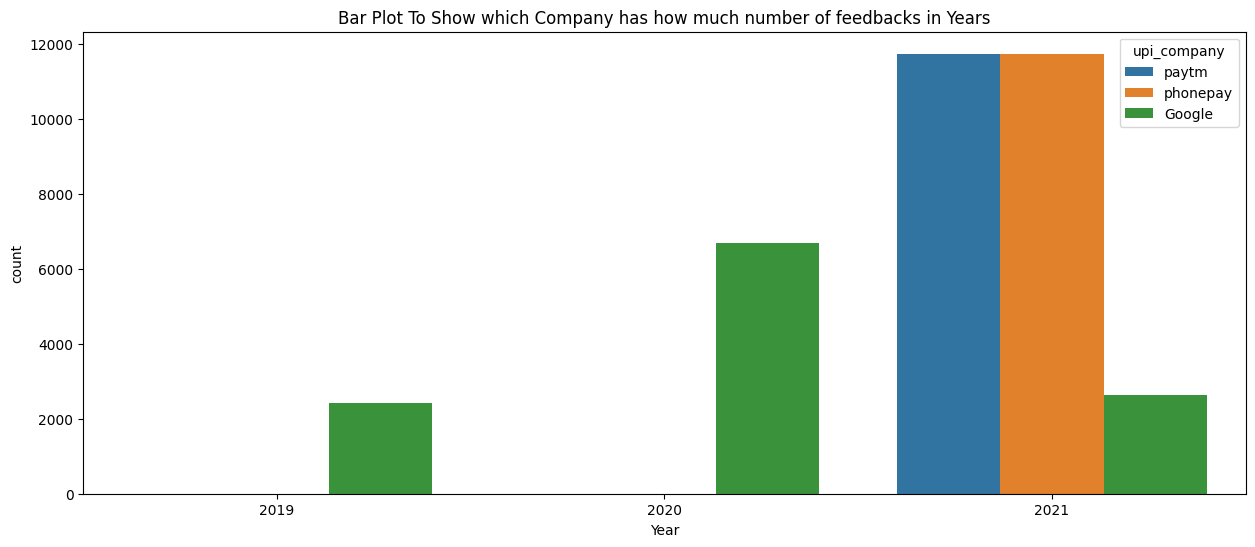

In [34]:
plt.figure(figsize=(15,6))
sns.countplot(data=data, x="Year", hue="upi_company")
plt.title('Bar Plot To Show which Company has how much number of feedbacks in Years')
plt.show()

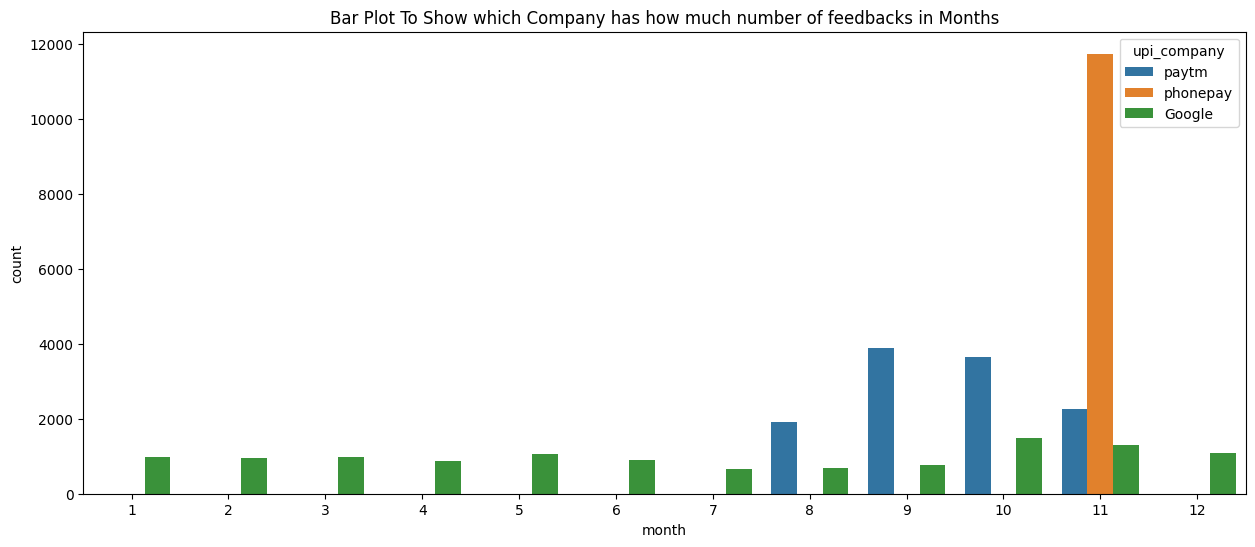

In [35]:
plt.figure(figsize=(15,6))
sns.countplot(data=data, x="month", hue="upi_company")
plt.title('Bar Plot To Show which Company has how much number of feedbacks in Months')
plt.show()

In [42]:
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras.models import Sequential
from keras.layers import Embedding, SpatialDropout1D, LSTM, Dense
from sklearn.model_selection import train_test_split
from keras.optimizers import Adam

In [43]:
data_model = data[['content','score']]
data_model['content'].fillna('', inplace=True)
token = Tokenizer(num_words=5000,split=' ')
token.fit_on_texts(data_model['content'].values)
X=token.texts_to_sequences(data_model['content'].values)
X = pad_sequences(X)
Y = pd.get_dummies(data_model['score'])
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(X,Y,test_size=0.3,random_state = 1)
modelf = Sequential()
modelf.add(Embedding(5000, 240, input_length = X.shape[1]))
modelf.add(SpatialDropout1D(0.2))
modelf.add(LSTM(176, dropout=0.2, recurrent_dropout=0.2))
modelf.add(Dense(5,activation='softmax'))
modelf.compile(loss = 'categorical_crossentropy', optimizer= Adam(learning_rate=0.1), metrics = ['accuracy'])
print(modelf.summary())
modelf.fit(x_train,y_train, epochs = 10, batch_size=1024, verbose = 'auto')
modelf.evaluate(x_test,y_test)

<ipython-input-43-a74efc1a8ee9>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_model['content'].fillna('', inplace=True)


Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_1 (Embedding)     (None, 164, 240)          1200000   
                                                                 
 spatial_dropout1d_1 (Spati  (None, 164, 240)          0         
 alDropout1D)                                                    
                                                                 
 lstm_1 (LSTM)               (None, 176)               293568    
                                                                 
 dense_1 (Dense)             (None, 5)                 885       
                                                                 
Total params: 1494453 (5.70 MB)
Trainable params: 1494453 (5.70 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
None
Epoch 1/10
25/25 [==============================] - 257s 10s/step - loss: 1.8

[0.9432663321495056, 0.6998674273490906]